In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [26]:
DATADIR = 'F:/jeevanthask/research/datasets/malvisdataset/train'
CATEGORIES = ["Adposhel","Agent","Allaple","Other"]

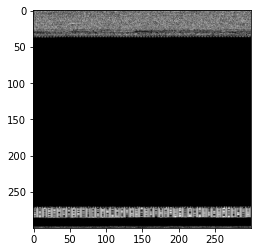

In [27]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [28]:
print(img_array)

[[ 60  54  21 ...  75  94 131]
 [103 111 113 ... 123  94 160]
 [171  89 134 ...  96  98 155]
 ...
 [ 10  11  11 ...  25  34  32]
 [ 70  71  57 ... 108 123 145]
 [ 61  54  51 ...  52  48  54]]


In [29]:
print(img_array.shape)

(300, 300)


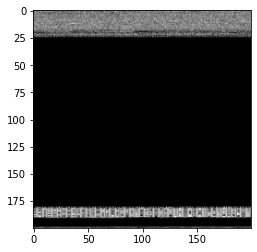

In [30]:
IMG_SIZE = 200

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [31]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()

In [32]:
print(len(training_data))

1400


In [33]:
import random
random.shuffle(training_data)

In [34]:
for sample in training_data[:10]:
    print(sample[1])

0
3
2
3
1
2
3
3
0
1


In [15]:
X = []
y = []

In [35]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [36]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [37]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [38]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [39]:
X[1]

array([[[ 77],
        [ 75],
        [ 80],
        ...,
        [ 97],
        [ 89],
        [ 87]],

       [[120],
        [101],
        [115],
        ...,
        [125],
        [113],
        [120]],

       [[101],
        [ 96],
        [100],
        ...,
        [107],
        [105],
        [106]],

       ...,

       [[107],
        [ 91],
        [ 99],
        ...,
        [ 90],
        [ 89],
        [ 94]],

       [[107],
        [113],
        [ 95],
        ...,
        [111],
        [114],
        [106]],

       [[ 83],
        [ 65],
        [ 85],
        ...,
        [ 80],
        [ 77],
        [ 83]]], dtype=uint8)